# Comparing different dimensionality reduction methods (PCA, t-SNE, UMAP) on different datasets (MNIST, EMNIST)

Comparison of PCA, t-SNE and UMAP feature reduction techniques on MNIST and EMNIST datasets.

There are two main approaches in reducing dimensionality. They are Projection and Manifold Learning. Projection methods tries to project every data point in high dimension to low dimension, while preserving the distance between them. In Manifold Learning, the algorithm works by modelling the manifold on which the training instances lie. The advantage of Manifold Learning methods that they are non-linear methods so that they can relate close samples to each other in a non-linear way with less effort.

**PCA (Principal Component Analysis):**

PCA is a linear dimensionality reduction technique.
It works by finding the linear combinations of the original features (principal components) that capture the most variance in the data.
PCA is primarily used for reducing the dimensionality of data while preserving as much variance as possible.
It is mathematically efficient and computationally faster compared to some non-linear techniques.

**t-SNE (t-Distributed Stochastic Neighbor Embedding):**

t-SNE is a non-linear dimensionality reduction technique.
It aims to preserve the pairwise similarities between data points in the lower-dimensional space.
t-SNE is particularly useful for visualizing high-dimensional data in a lower-dimensional space where similar data points are clustered together.
It is sensitive to the choice of hyperparameters, and different runs with different hyperparameters can result in varying results.

**UMAP (Uniform Manifold Approximation and Projection):**

UMAP is a non-linear dimensionality reduction technique similar to t-SNE.
It focuses on preserving both local and global structures in the data.
UMAP is known for its ability to scale well to large datasets and provides consistent and stable embeddings across multiple runs.
It offers more flexibility in parameter tuning compared to t-SNE.

**Similarities**:

Both t-SNE and UMAP are non-linear dimensionality reduction techniques, meaning they can capture complex relationships in the data that PCA (a linear technique) may miss.
They are commonly used for visualizing high-dimensional data in lower-dimensional spaces, making it easier to explore and understand data patterns.
Both t-SNE and UMAP aim to group similar data points together in the lower-dimensional space, which is useful for data visualization and clustering.

**Differences:**

PCA is a linear technique, while t-SNE and UMAP are non-linear techniques. This means PCA assumes that the relationships between features are linear, while t-SNE and UMAP can capture non-linear relationships.
t-SNE and UMAP are known for their effectiveness in preserving the local structure of the data, ensuring that similar data points are closely grouped, while PCA focuses on preserving overall variance.
UMAP is often preferred for large datasets due to its scalability and the ability to provide consistent embeddings across runs. t-SNE can be computationally expensive and sensitive to hyperparameters.
PCA is widely used for tasks like feature selection and dimensionality reduction, while t-SNE and UMAP are primarily used for visualization and exploring complex data structures.

## Install dependencies

In [ ]:
pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=5915d5d6bdb1da586ac4aa1cf9a51e329b4fb0bfe6db1199c39a0da0626dec72
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=60fc8d60b20c5f9ebba5530d90be41fe0535449e3e1f52ab97d9f9cb5e9fd689
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


## Import dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import KFold
from umap import UMAP
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import (
    davies_bouldin_score,
    silhouette_score,
    make_scorer, )


## Mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
digits_train_dataset_path = "/content/drive/MyDrive/data/mnist_train.csv"
digits_test_dataset_path = "/content/drive/MyDrive/data/mnist_test.csv"
letters_train_dataset_path = "/content/drive/MyDrive/data/emnist-letters-train.csv"
letters_test_dataset_path = "/content/drive/MyDrive/data/emnist-letters-test.csv"
max_pixel_intensity = 255

# Read datasets

In [ ]:
digits_train = pd.read_csv(digits_train_dataset_path)
digits_test = pd.read_csv(digits_test_dataset_path)

letters_train = pd.read_csv(letters_train_dataset_path, header=None)
letters_test = pd.read_csv(letters_test_dataset_path, header=None)


In [ ]:
letters_train.columns, letters_test.columns = digits_train.columns, digits_test.columns

# Join train and test datasets

In [ ]:
digits_data = pd.concat([digits_train, digits_test], axis=0).reset_index()
letters_data = pd.concat([letters_train, letters_test], axis=0).reset_index()


# EDA

In [ ]:
digits_data.head(), letters_data.head()

(   index  label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  ...  28x19  28x20  \
 0      0      5    0    0    0    0    0    0    0    0  ...      0      0   
 1      1      0    0    0    0    0    0    0    0    0  ...      0      0   
 2      2      4    0    0    0    0    0    0    0    0  ...      0      0   
 3      3      1    0    0    0    0    0    0    0    0  ...      0      0   
 4      4      9    0    0    0    0    0    0    0    0  ...      0      0   
 
    28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
 0      0      0      0      0      0      0      0      0  
 1      0      0      0      0      0      0      0      0  
 2      0      0      0      0      0      0      0      0  
 3      0      0      0      0      0      0      0      0  
 4      0      0      0      0      0      0      0      0  
 
 [5 rows x 786 columns],
    index  label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  ...  28x19  28x20  \
 0      0     23    0    0    0    0    0    0    0 

In [ ]:
digits_data.info(), letters_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 786 entries, index to 28x28
dtypes: int64(786)
memory usage: 419.8 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103600 entries, 0 to 103599
Columns: 786 entries, index to 28x28
dtypes: int64(786)
memory usage: 621.3 MB


(None, None)

In [ ]:
digits_data.shape, letters_data.shape

((70000, 786), (103600, 786))

## Summary statistics

In [ ]:
digits_data.describe(), letters_data.describe()

(              index         label      1x1      1x2      1x3      1x4  \
 count  70000.000000  70000.000000  70000.0  70000.0  70000.0  70000.0   
 mean   26428.071429      4.452429      0.0      0.0      0.0      0.0   
 std    18299.418825      2.890195      0.0      0.0      0.0      0.0   
 min        0.000000      0.000000      0.0      0.0      0.0      0.0   
 25%     8749.750000      2.000000      0.0      0.0      0.0      0.0   
 50%    24999.500000      4.000000      0.0      0.0      0.0      0.0   
 75%    42499.250000      7.000000      0.0      0.0      0.0      0.0   
 max    59999.000000      9.000000      0.0      0.0      0.0      0.0   
 
            1x5      1x6      1x7      1x8  ...         28x19         28x20  \
 count  70000.0  70000.0  70000.0  70000.0  ...  70000.000000  70000.000000   
 mean       0.0      0.0      0.0      0.0  ...      0.197414      0.099543   
 std        0.0      0.0      0.0      0.0  ...      5.991206      4.256304   
 min        0.0 

## Check for missing values

In [ ]:
def check_missing_values(df: pd.DataFrame) -> bool:
    has_missing_values = df.isna().any().any()
    print(f"Dataframe has missing values: {has_missing_values}")
    return has_missing_values

In [ ]:
check_missing_values(df=digits_data), check_missing_values(df=letters_data)

Dataframe has missing values: False
Dataframe has missing values: False


(False, False)

## Calculate feature matrix sparsity

In [ ]:
def calculate_sparsity(df: pd.DataFrame) -> float:
    sparsity = ((df == 0).sum().sum() / df.size) * 100
    print(f"Dataframe is {round(sparsity, 2)}% sparse")
    return sparsity

In [ ]:
calculate_sparsity(df=digits_data), calculate_sparsity(df=letters_data)

Dataframe is 80.66% sparse
Dataframe is 66.86% sparse


(80.66435841512177, 66.85902792105082)

# Preprocessing

## Split x, y

In [ ]:
digits_x, digits_y = digits_data.drop(columns=['label']), digits_data.pop(item='label')
letters_x, letters_y = letters_data.drop(columns=['label']), letters_data.pop(item='label')

## Drop constant pixels, Scale and Normalize

In [ ]:
class DropConstantPixelsTransformer(BaseEstimator, TransformerMixin):
    def __int__(self):
        pass

    def fit(self, x: pd.DataFrame):
        return self

    def transform(self, x: pd.DataFrame):
        return x.drop(columns=[col for col in x.columns if x[col].max() == x[col].min()])

In [ ]:
pipeline = Pipeline(steps=[
        ('drop_constant_pixels', DropConstantPixelsTransformer()),
        ('scaler', MinMaxScaler())
    ])
pipeline.steps

[('drop_constant_pixels', DropConstantPixelsTransformer()),
 ('scaler', MinMaxScaler())]

## Transform X

In [ ]:
digits_x_transformed = pipeline.fit_transform(digits_x)
letters_x_transformed = pipeline.fit_transform(letters_x)

## Check if Y are balanced

In [ ]:
def get_label_frequency(series: pd.Series) -> pd.DataFrame:
    return pd.DataFrame(series.value_counts()).reset_index().rename(columns={
        "label": "count",
        "index": "label",
    }).sort_values(by="label")

In [ ]:
digits_y_value_counts, letters_y_value_counts = get_label_frequency(series=digits_y), get_label_frequency(
    series=letters_y)

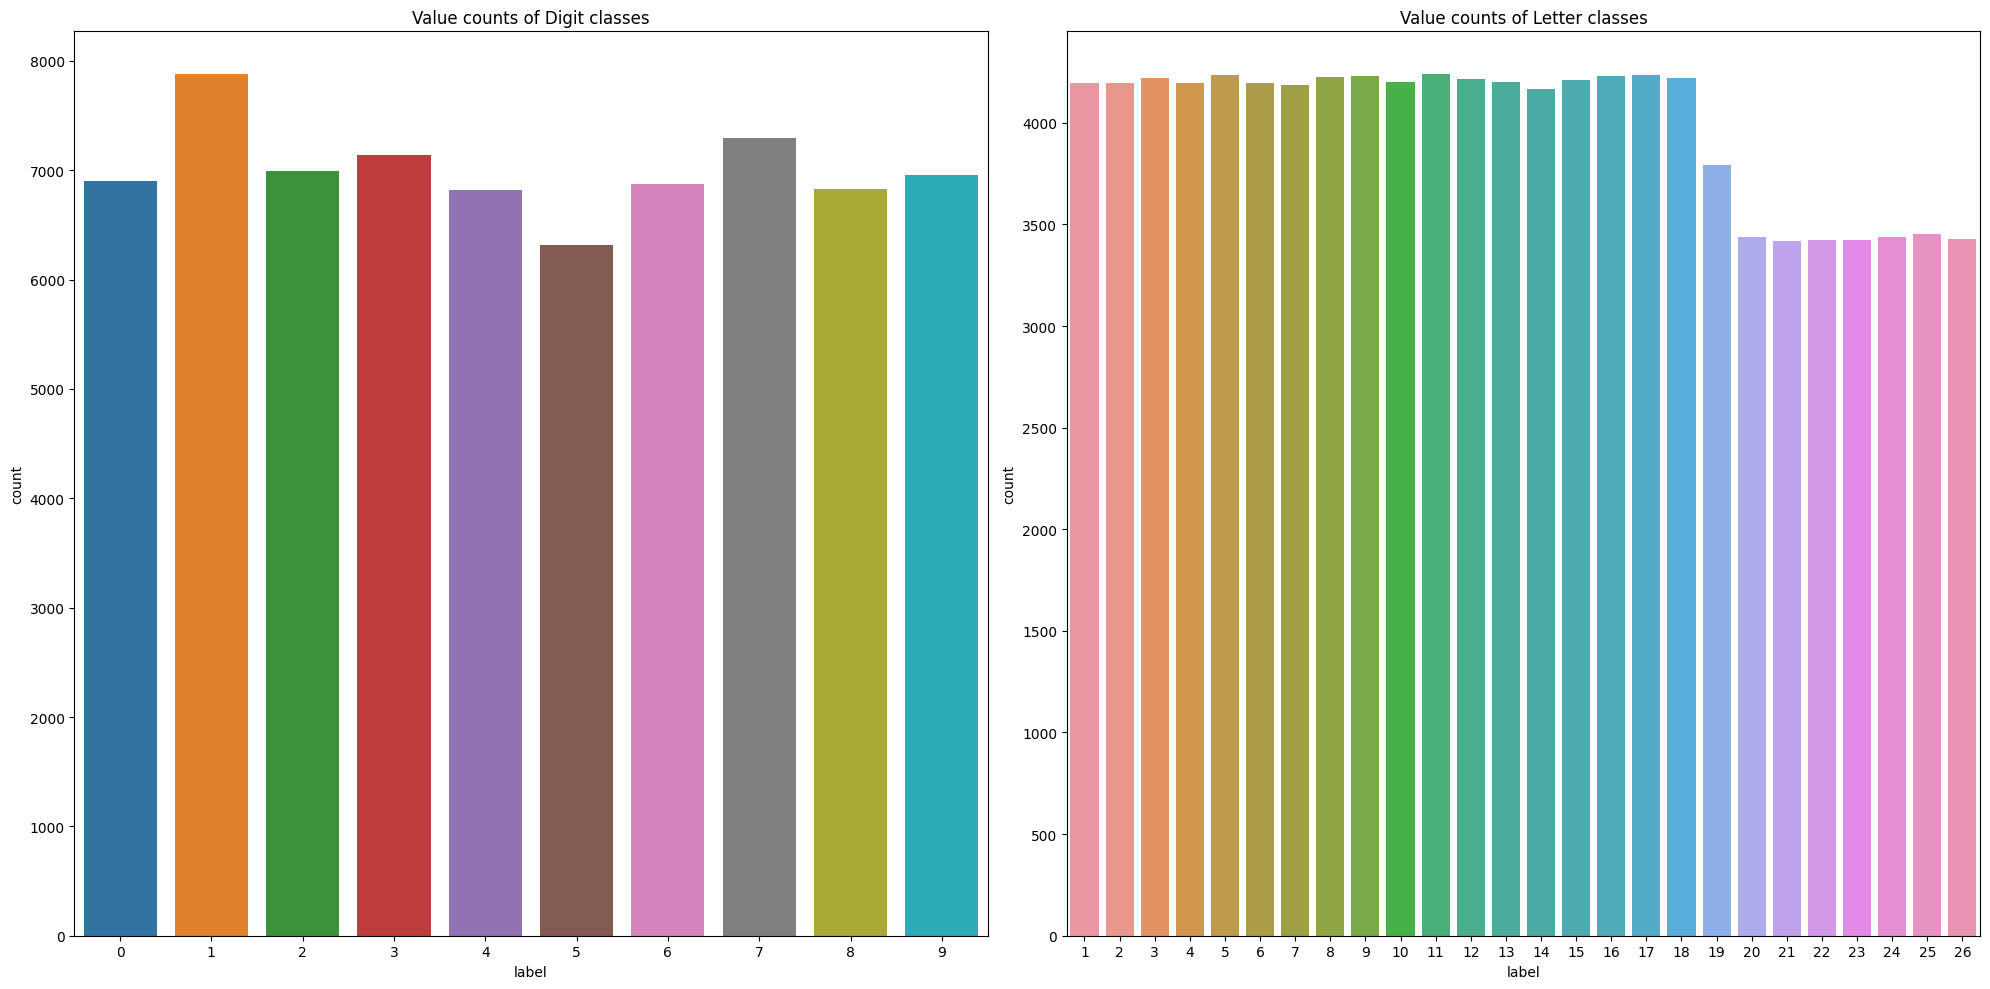

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
for index, data, name in zip([0, 1], [digits_y_value_counts, letters_y_value_counts], ["Digit", "Letter"]):
    sns.barplot(y="count", x="label", data=data, ax=ax[index])
    ax[index].set_title(f"Value counts of {name} classes")
plt.tight_layout()

We can conclude that both datasets are realatively balanced. One thing to note about the **Digits** dataset is that the most used number is **1**, and the least used number is **5**, while, the most used letters in the **Letters** dataset are **[A-R]**, which are followed by **S**, and the rest of the letters **[T-Z]** .

# Model Selection

## Custom Scoring Function

We approach these problems as unsupervised learning tasks, assuming that the number of clusters is already known. The rationale behind defining the custom_scoring_function is based on specific criteria:
1. **Silhouette Score:**

* The Silhouette Score is a metric used to measure the quality of clustering.
* It provides a value between -1 and 1, where a higher score indicates better clustering.
* The score is calculated for each data point by comparing the mean intra-cluster distance (a) with the mean nearest-cluster distance (b).
* The formula for the Silhouette Coefficient is (b - a) / max(a, b).
* A Silhouette Score of 1 indicates that the data point is well-clustered, while a score of -1 suggests that it may be misclassified.

2. **Davies-Bouldin Index:**

* The Davies-Bouldin Index is another metric for assessing clustering quality.
* It measures the average similarity between each cluster and its most similar cluster.
* Lower values of the Davies-Bouldin Index indicate better clustering, with a minimum score of zero.
* The similarity is calculated as the ratio of within-cluster distances to between-cluster distances.
* Clusters that are far apart and less dispersed will result in a lower index.
Custom Scoring Function:

**A custom scoring function is defined as the difference between the Silhouette Coefficient (shc) and the inverted Davies-Bouldin Index (dbi). The inversion is done to turn negative values into positive ones.
The goal is to maximize this custom scoring function, which effectively combines the two metrics to assess the overall quality of clustering.**

### **How to interpretate the value returned by this function**

1. **Negative** values indicate that the Davies-Boulding Index is higher than Silhouette Score, suggesting that cluster separation dominates cluster cohesion.
2. **Zero** value implies balanced between cluster cohesion and cluster separation
3. **Positive** values indicate that Silhouette Score is higher than Davies-Bouldin Index, suggesting that cluster cohesion dominates cluster separation.

In [ ]:
def custom_scoring_function(X, y_true):
    sh_score = silhouette_score(X=X, labels=y_true)
    db_score = davies_bouldin_score(X=X, labels=y_true)
    return sh_score - db_score

custom_scorer = make_scorer(custom_scoring_function, greater_is_better=True)

## Define dataset dictionary

In [ ]:
datasets = [{
    "name": "Digits",
    "x" : digits_x_transformed,
    "y": digits_y,
    "n_components": len(digits_x_transformed[0])
},
{   "name": "Letters",
    "x" : letters_x_transformed,
    "y": letters_y,
    "n_components": len(letters_x_transformed[0])
},
            ]

# Determining the optimal number of components

## In order to determine the optimal number of componenets of PCA, we need to define few things:
1. **Explained Variance Ratios**:

* These ratios indicate how much each principal component contributes to the total variance in the data.
* They provide insights into the significance of each component in capturing information from the original features.
* Higher ratios suggest that a component explains a larger proportion of the data's variance.
2. **Cumulative Variance:**

* Cumulative variance represents the total amount of variance explained by including a specific number of principal components.
* It is useful for determining how many components are needed to retain a certain percentage of the total variance.
* As you include more components, the cumulative variance typically increases, showing the cumulative contribution of each component.

3. **Threshold (0.95):**

* Setting a threshold of 0.95 means that the goal is to retain at least 95% of the total variance in the data during dimensionality reduction.
* The optimal number of components is determined by finding the point at which the cumulative variance crosses or reaches 0.95.
* This threshold helps in selecting an appropriate number of components that retains most of the important information while reducing dimensionality.

## PCA

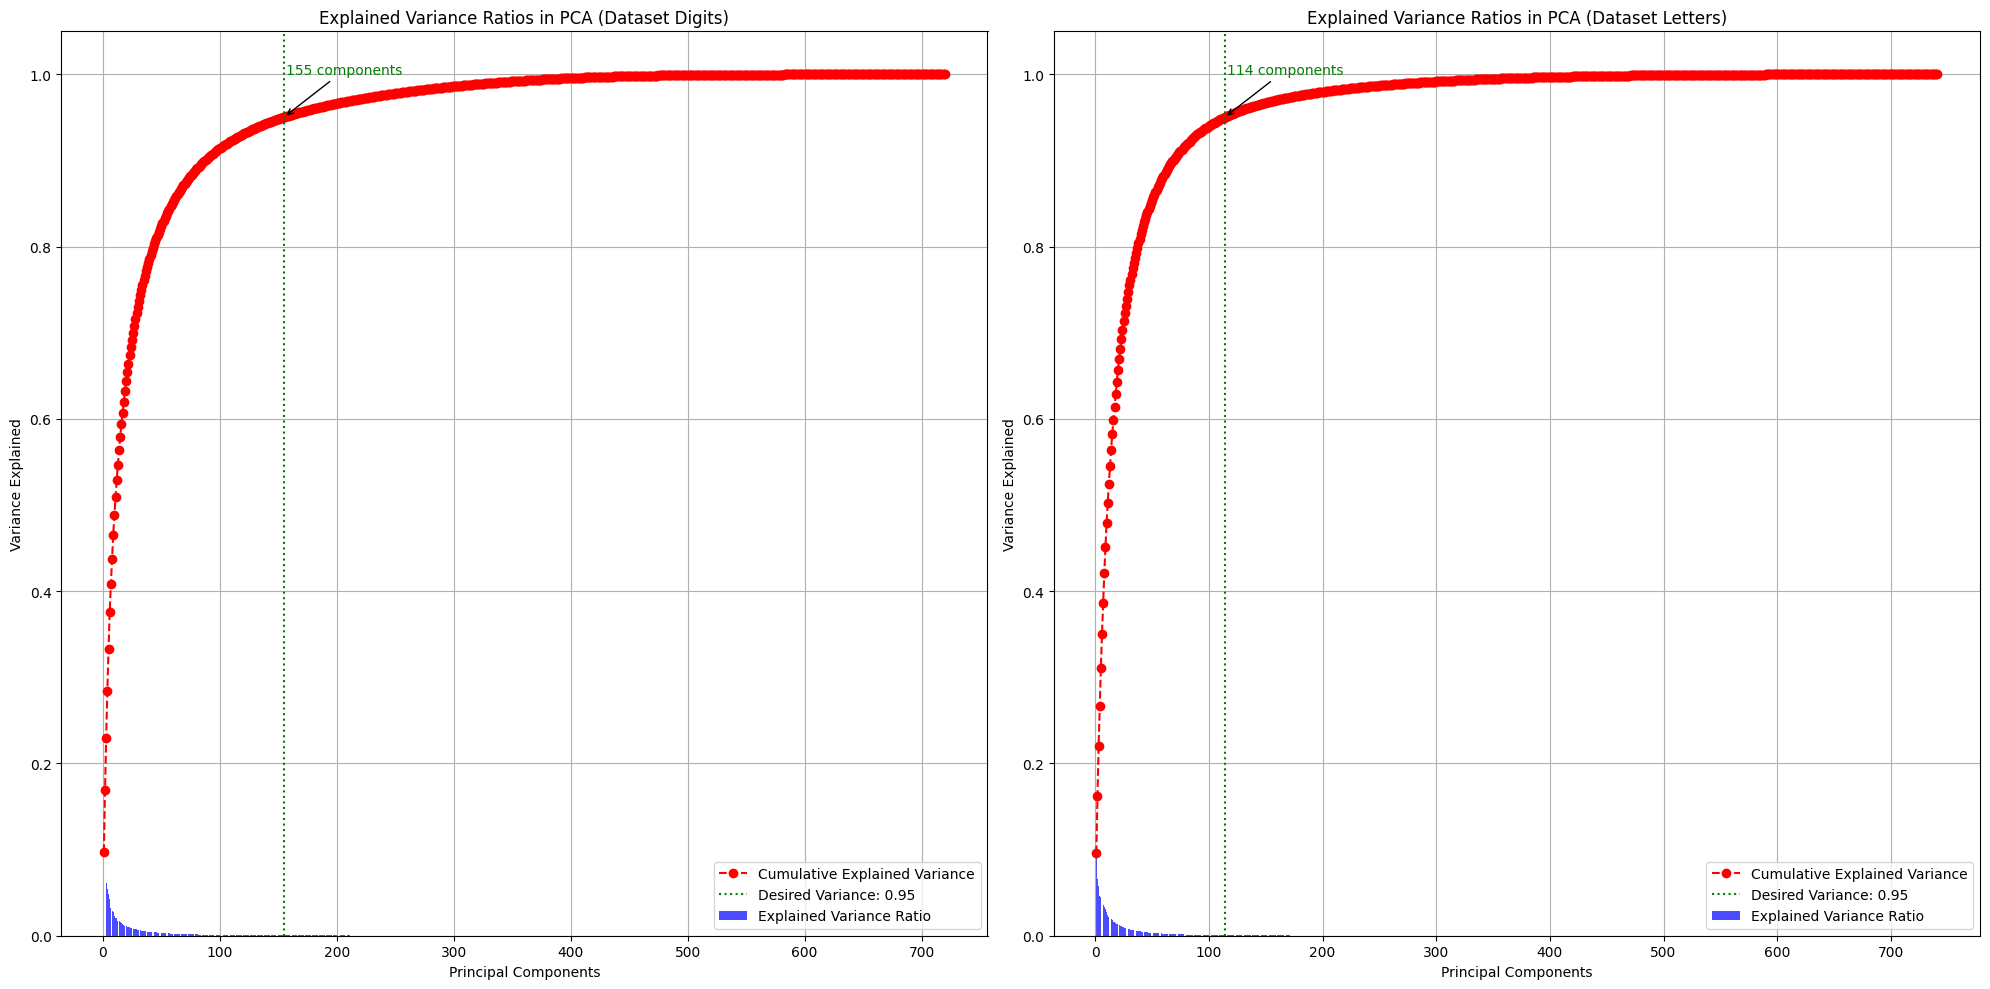

In [ ]:
desired_variance_ratio = 0.95

plt.figure(figsize=(20, 10))

for index, dataset in enumerate(datasets):
    n_components = dataset["n_components"]
    x = dataset["x"]
    pca = PCA(n_components=n_components)
    pca.fit(x)

    explained_variances = pca.explained_variance_ratio_
    cumulative_variances = np.cumsum(explained_variances)
    num_components_desired = np.argmax(cumulative_variances >= desired_variance_ratio) + 1

    plt.subplot(1, len(datasets), index + 1)

    plt.bar(range(1, n_components + 1), explained_variances, label='Explained Variance Ratio', alpha=0.7, align='center', color='blue')

    plt.plot(range(1, n_components + 1), cumulative_variances, marker='o', label='Cumulative Explained Variance', linestyle='--', color='red')
    plt.annotate(f'{num_components_desired} components', xy=(num_components_desired, cumulative_variances[num_components_desired - 1]), xytext=(num_components_desired + 2, cumulative_variances[num_components_desired - 1] + 0.05),
                 arrowprops=dict(facecolor='green', arrowstyle='->'), color='green')


    plt.axvline(num_components_desired, color='green', linestyle=':', label=f'Desired Variance: {desired_variance_ratio:.2f}')
    plt.xlabel('Principal Components')
    plt.ylabel('Variance Explained')
    plt.legend()
    plt.title(f'Explained Variance Ratios in PCA (Dataset {dataset["name"]})')
    plt.grid(True)

plt.tight_layout()
plt.show()


The point where cumulative explained variance is equal to 0.95 is when:
*  n_components = 155 for the MNIST Digits dataset
*  n_components = 114 for the EMNIST Letters dataset

# t-SNE & UMAP

* Perform the same analysis as per PCA, except, permutate the variance ratios to support the decision of determining the number of components. We compare the observed variance explained by principal componenets with permuted variance.
* **Refer to this link for more in depth explanation:
https://towardsdatascience.com/how-to-tune-hyperparameters-of-tsne-7c0596a18868**

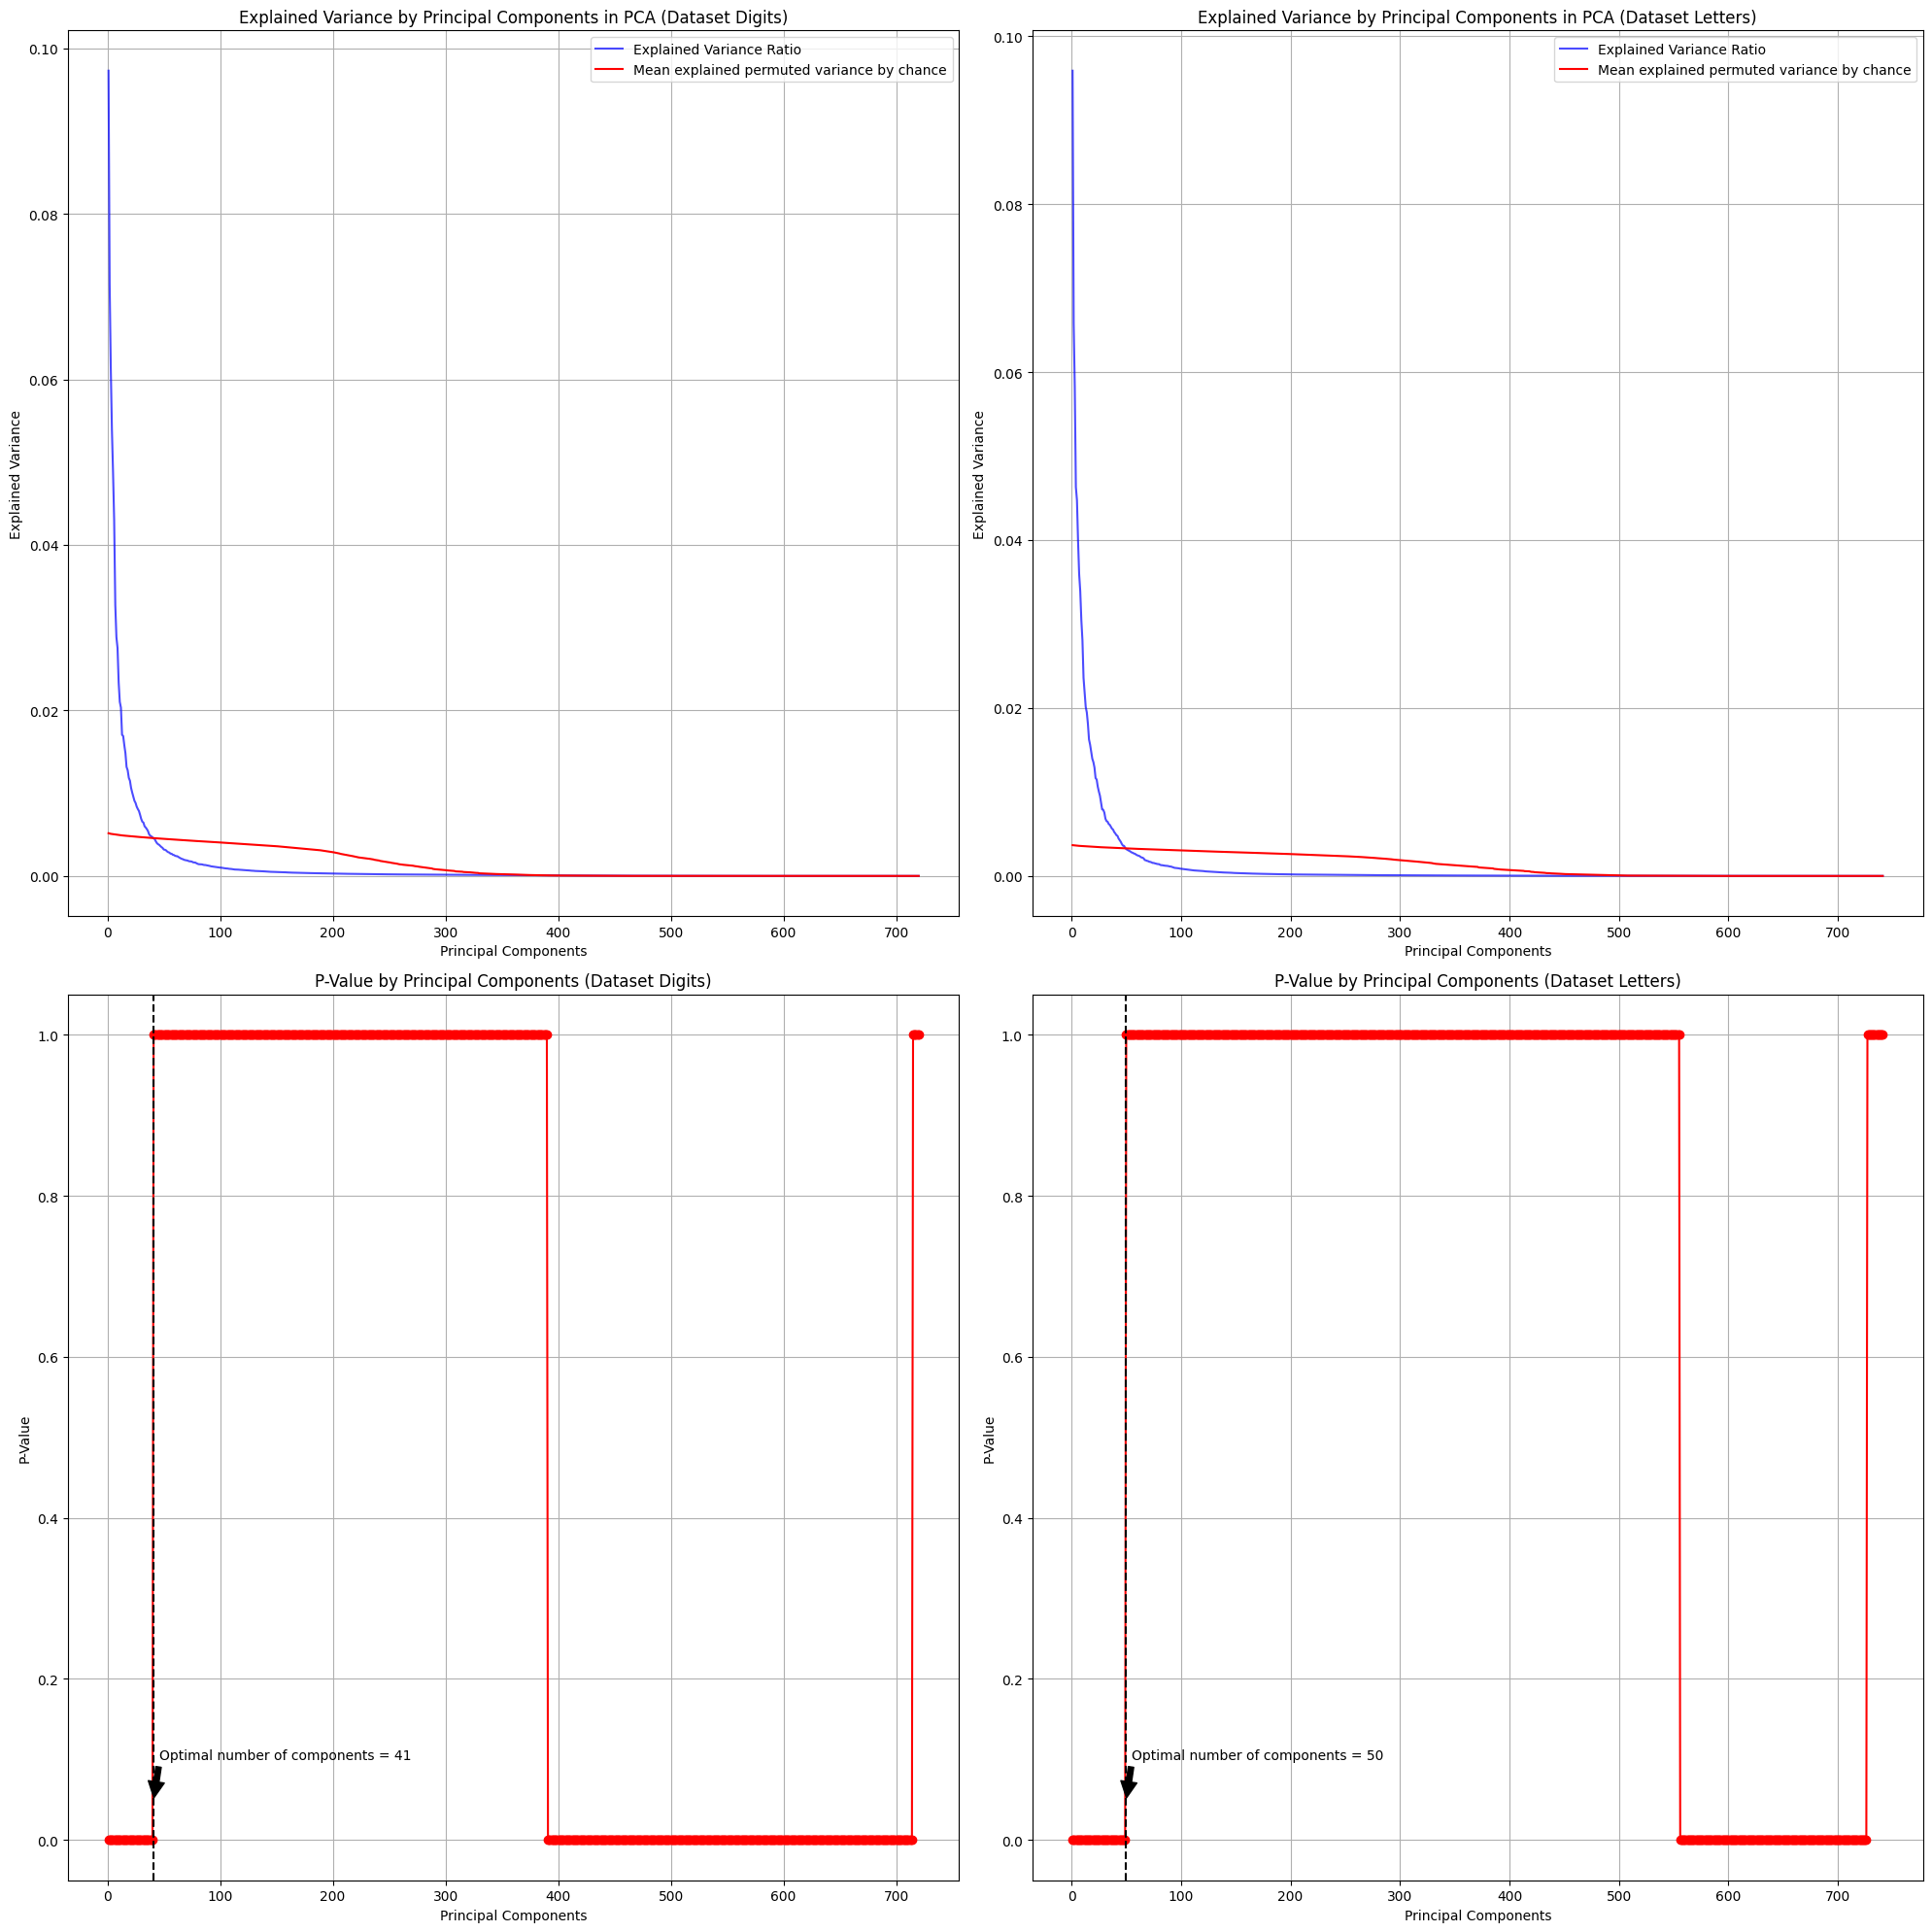

In [ ]:
n_permutations = 10

plt.figure(figsize=(20, 20))
for index, dataset in enumerate(datasets):
  x = dataset["x"]
  n_components = dataset["n_components"]
  explained_variances_permutation = np.empty((n_permutations, n_components))
  for k in range(n_permutations):
      expr_perm = np.apply_along_axis(np.random.permutation, 1, x.T).T
      pca_perm = PCA(n_components=n_components)
      pca_perm.fit(X=np.log10(expr_perm + 1))
      explained_variances_permutation[k, :] = ((pca_perm.explained_variance_ ** 2) / np.sum(pca_perm.explained_variance_ ** 2))

  plt.subplot(2, 2, 1 if dataset["name"] == 'Digits' else 2)
  pca = PCA(n_components=n_components).fit(X=x)
  explained_variances = pca.explained_variance_ratio_
  plt.plot(range(1, n_components + 1), explained_variances, label='Explained Variance Ratio', alpha=0.7, color='blue')
  plt.plot(range(1, n_components + 1), np.mean(explained_variances_permutation, axis=0)[:n_components], 'r-', label="Mean explained permuted variance by chance")
  plt.xlabel("Principal Components")
  plt.ylabel("Explained Variance")
  plt.legend(loc="upper right")
  plt.title(f"Explained Variance by Principal Components in PCA (Dataset {dataset['name']})")
  plt.grid(True)

  p_values = np.sum(explained_variances_permutation >= pca.explained_variance_ratio_[:n_components], axis=0) / n_permutations
  plt.subplot(2, 2, 3 if dataset["name"] == 'Digits' else 4)
  plt.plot(range(1, n_components + 1), p_values[:n_components], 'ro-')
  plt.xlabel("Principal Components")
  plt.ylabel("P-Value")
  plt.title(f"P-Value by Principal Components (Dataset {dataset['name']})")
  plt.grid(True)

  optimal_num_components = np.argmax(p_values >= 0.05) + 1
  plt.axvline(x=optimal_num_components, color='k', linestyle='--')
  plt.annotate(f'Optimal number of components = {optimal_num_components}', xy=(optimal_num_components, 0.05), xytext=(optimal_num_components + 5, 0.1),
        arrowprops=dict(facecolor='black', shrink=0.05))
plt.tight_layout()
plt.show()

The red line describes the mean of the permutated variance explained by the number of principal components. The optimal number of components is the cross point of the observed variance and permuted variance, which determines the number of informative principal components.

**For visualization purposes, we'll explore the performances of the dimensionality reduction methods when the number of components is 2 or 3**

# Model Evaluation

In [ ]:
models = []


# PCA

## n_components = 2

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


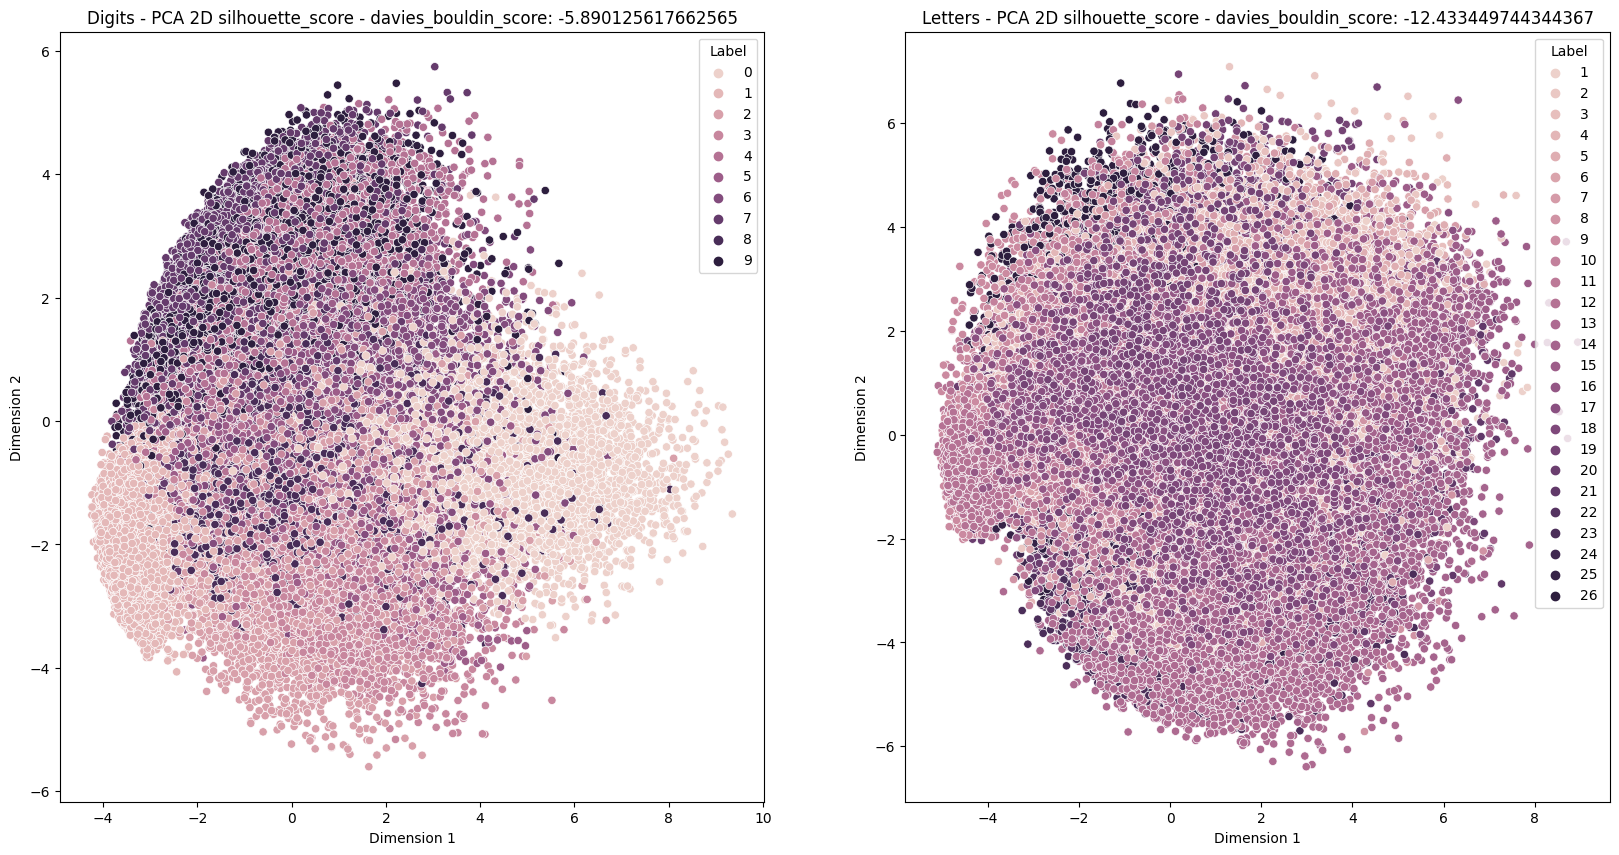

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
for i, dataset in enumerate(datasets):
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(dataset["x"])
    df_reduced = pd.DataFrame(data=reduced_data, columns=['Dimension 1', 'Dimension 2'])
    df_reduced['Label'] = dataset["y"]
    score = custom_scoring_function(X=reduced_data, y_true=dataset["y"])
    ax = sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Label', data=df_reduced, ax=axes[i], legend='full')
    ax.set_title(f'{dataset["name"]} - PCA 2D silhouette_score - davies_bouldin_score: {score}')
    models.append(
        {
            "method_name": "PCA",
            "n_components": 2,
            "dataset_name": dataset["name"],
            "score": score
        }
    )


## n_components = 3

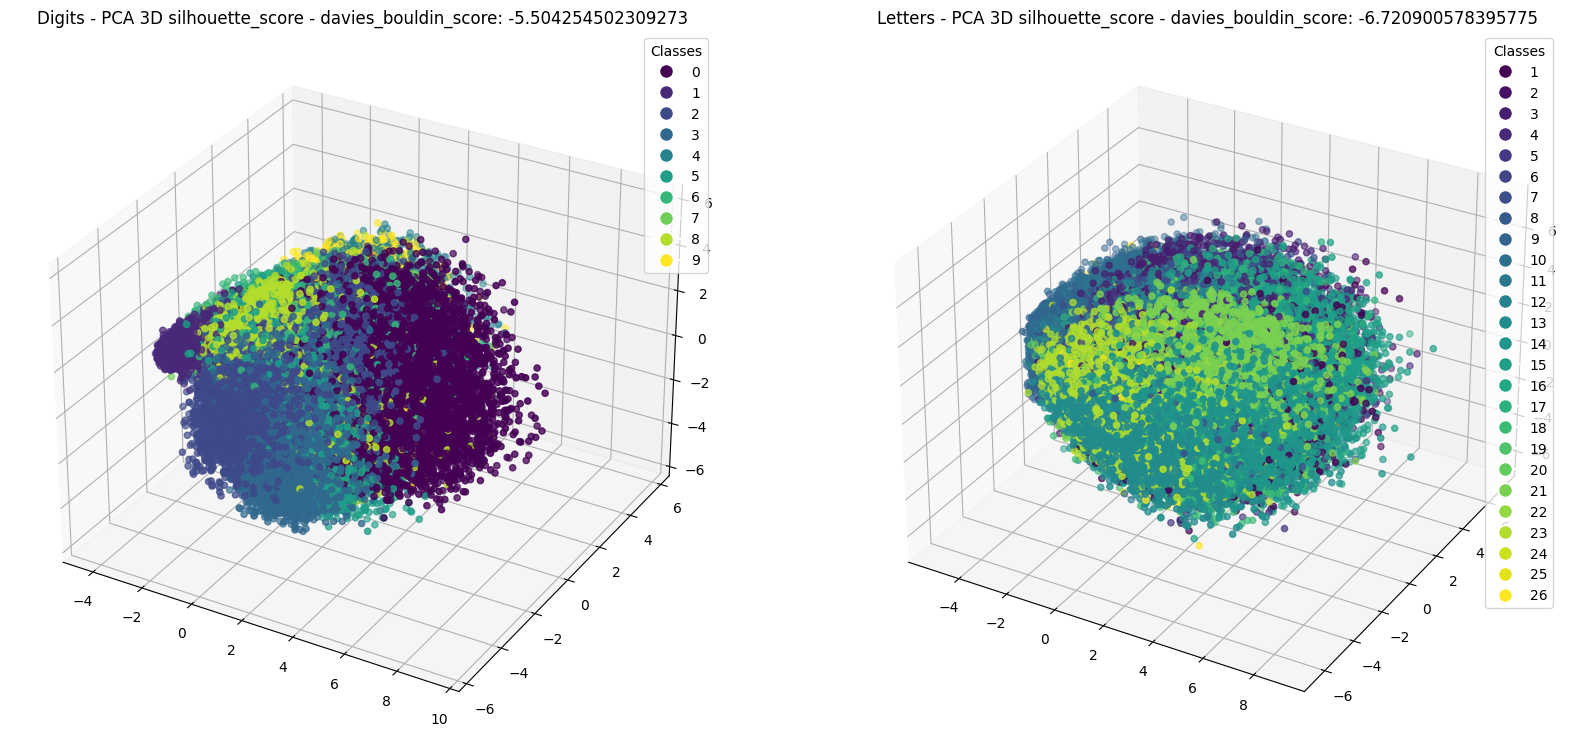

In [ ]:
fig = plt.figure(figsize=(20, 10))

for i, dataset in enumerate(datasets):
    pca = PCA(n_components=3)
    reduced_data = pca.fit_transform(dataset["x"])
    df_reduced = pd.DataFrame(data=reduced_data, columns=['Dimension 1', 'Dimension 2', 'Dimension 3'])
    df_reduced['Label'] = dataset["y"]
    score = custom_scoring_function(X=reduced_data, y_true=dataset["y"])

    ax = plt.subplot(1, 2, i+1, projection='3d')
    scatter = ax.scatter(df_reduced['Dimension 1'], df_reduced['Dimension 2'], df_reduced['Dimension 3'], c=df_reduced['Label'], cmap='viridis')
    ax.set_title(f'{dataset["name"]} - PCA 3D silhouette_score - davies_bouldin_score: {score}')

    unique_labels = sorted(df_reduced['Label'].unique())

    models.append(
        {
            "method_name": "PCA",
            "n_components": 3,
            "dataset_name": dataset["name"],
            "score": score
        }
    )

    handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10,
                    markerfacecolor=scatter.cmap(scatter.norm(label))) for label in unique_labels]
    plt.legend(handles=handles, title='Classes')

plt.show()


# t-SNE

## Selecting the optimal perplexity

* The rule of thumb is to select perplexity values between 5 and 50.
* What if there is a systematic approach to determining the perplexity of the t-SNE algorithm?
* Loosely speaking, one could say that a larger/denser data set requires a larger perplexity.
* So, we need to provide a functional for of perplexity vs number of samples. The functional form is: **Perplexity ~ NumberOfSamples^(1/2)**
* **For more in-depth explaination how the functional form is derived refer to this link:
https://towardsdatascience.com/how-to-tune-hyperparameters-of-tsne-7c0596a18868**


## n_components = 2

[t-SNE] Computing 793 nearest neighbors...
[t-SNE] Indexed 70000 samples in 0.215s...
[t-SNE] Computed neighbors for 70000 samples in 210.715s...
[t-SNE] Computed conditional probabilities for sample 1000 / 70000
[t-SNE] Computed conditional probabilities for sample 2000 / 70000
[t-SNE] Computed conditional probabilities for sample 3000 / 70000
[t-SNE] Computed conditional probabilities for sample 4000 / 70000
[t-SNE] Computed conditional probabilities for sample 5000 / 70000
[t-SNE] Computed conditional probabilities for sample 6000 / 70000
[t-SNE] Computed conditional probabilities for sample 7000 / 70000
[t-SNE] Computed conditional probabilities for sample 8000 / 70000
[t-SNE] Computed conditional probabilities for sample 9000 / 70000
[t-SNE] Computed conditional probabilities for sample 10000 / 70000
[t-SNE] Computed conditional probabilities for sample 11000 / 70000
[t-SNE] Computed conditional probabilities for sample 12000 / 70000
[t-SNE] Computed conditional probabilities for 

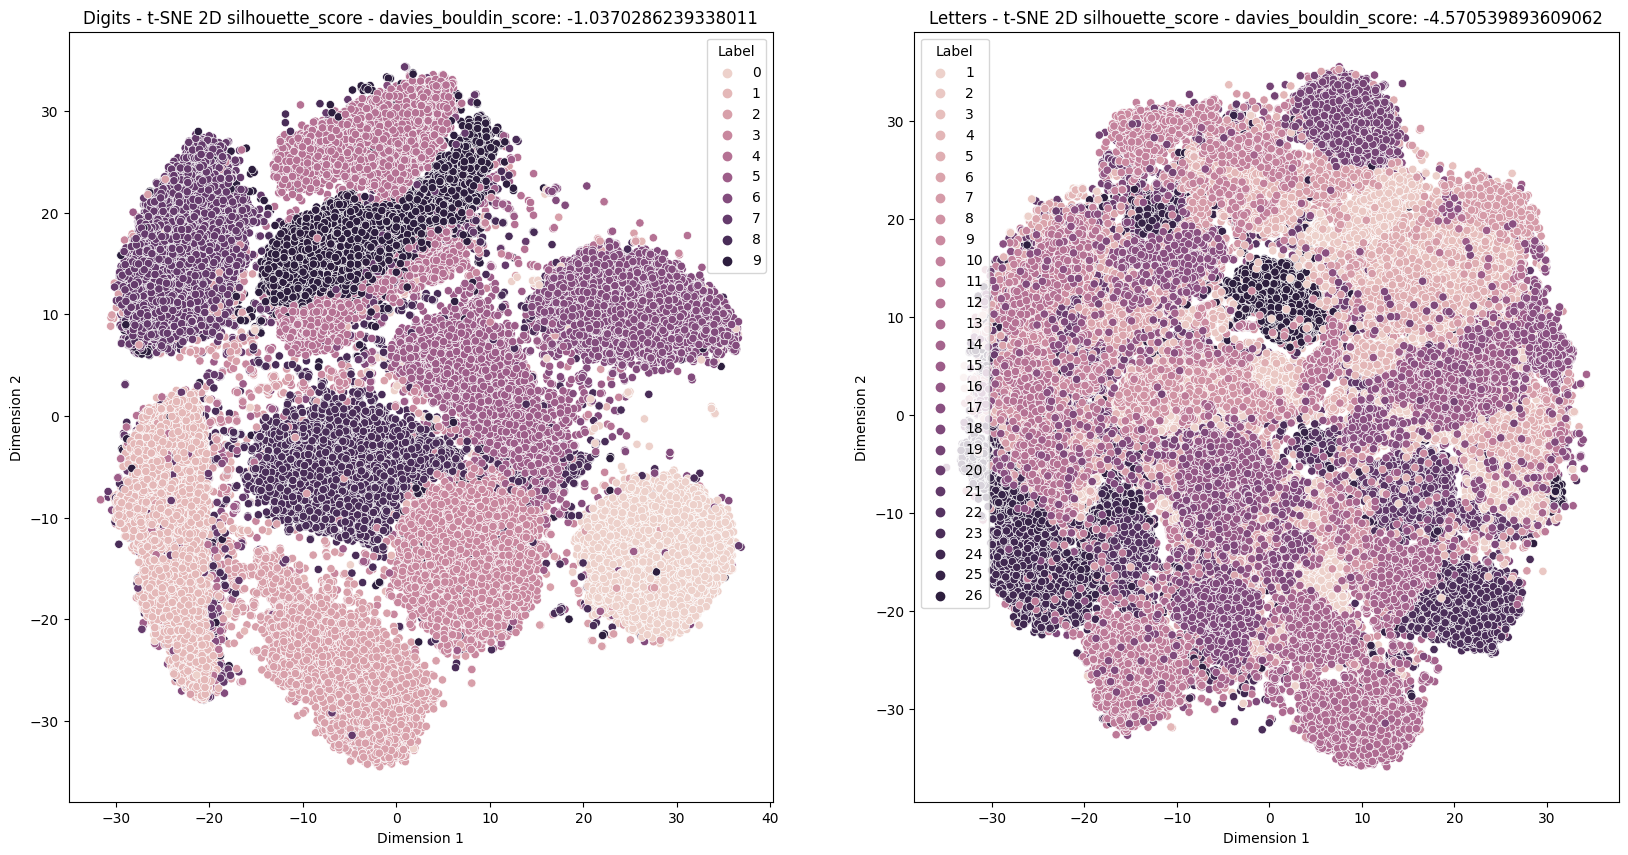

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
for i, dataset in enumerate(datasets):
    optimal_perplexity = int(len(dataset["x"]) ** (1/2))
    tsne = TSNE(n_components=2, verbose=4, n_iter=500, perplexity=optimal_perplexity)
    reduced_data = tsne.fit_transform(dataset["x"])
    df_reduced = pd.DataFrame(data=reduced_data, columns=['Dimension 1', 'Dimension 2'])
    df_reduced['Label'] = dataset["y"]
    score = custom_scoring_function(X=reduced_data, y_true=dataset["y"])
    ax = sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Label', data=df_reduced, ax=axes[i], legend='full')
    ax.set_title(f'{dataset["name"]} - t-SNE 2D silhouette_score - davies_bouldin_score: {score}')
    models.append(
        {
            "method_name": "t-SNE",
            "n_components": 2,
            "dataset_name": dataset["name"],
            "score": score
        }
    )
plt.show()

## n_components = 3

[t-SNE] Computing 793 nearest neighbors...
[t-SNE] Indexed 70000 samples in 0.419s...
[t-SNE] Computed neighbors for 70000 samples in 329.378s...
[t-SNE] Computed conditional probabilities for sample 1000 / 70000
[t-SNE] Computed conditional probabilities for sample 2000 / 70000
[t-SNE] Computed conditional probabilities for sample 3000 / 70000
[t-SNE] Computed conditional probabilities for sample 4000 / 70000
[t-SNE] Computed conditional probabilities for sample 5000 / 70000
[t-SNE] Computed conditional probabilities for sample 6000 / 70000
[t-SNE] Computed conditional probabilities for sample 7000 / 70000
[t-SNE] Computed conditional probabilities for sample 8000 / 70000
[t-SNE] Computed conditional probabilities for sample 9000 / 70000
[t-SNE] Computed conditional probabilities for sample 10000 / 70000
[t-SNE] Computed conditional probabilities for sample 11000 / 70000
[t-SNE] Computed conditional probabilities for sample 12000 / 70000
[t-SNE] Computed conditional probabilities for 

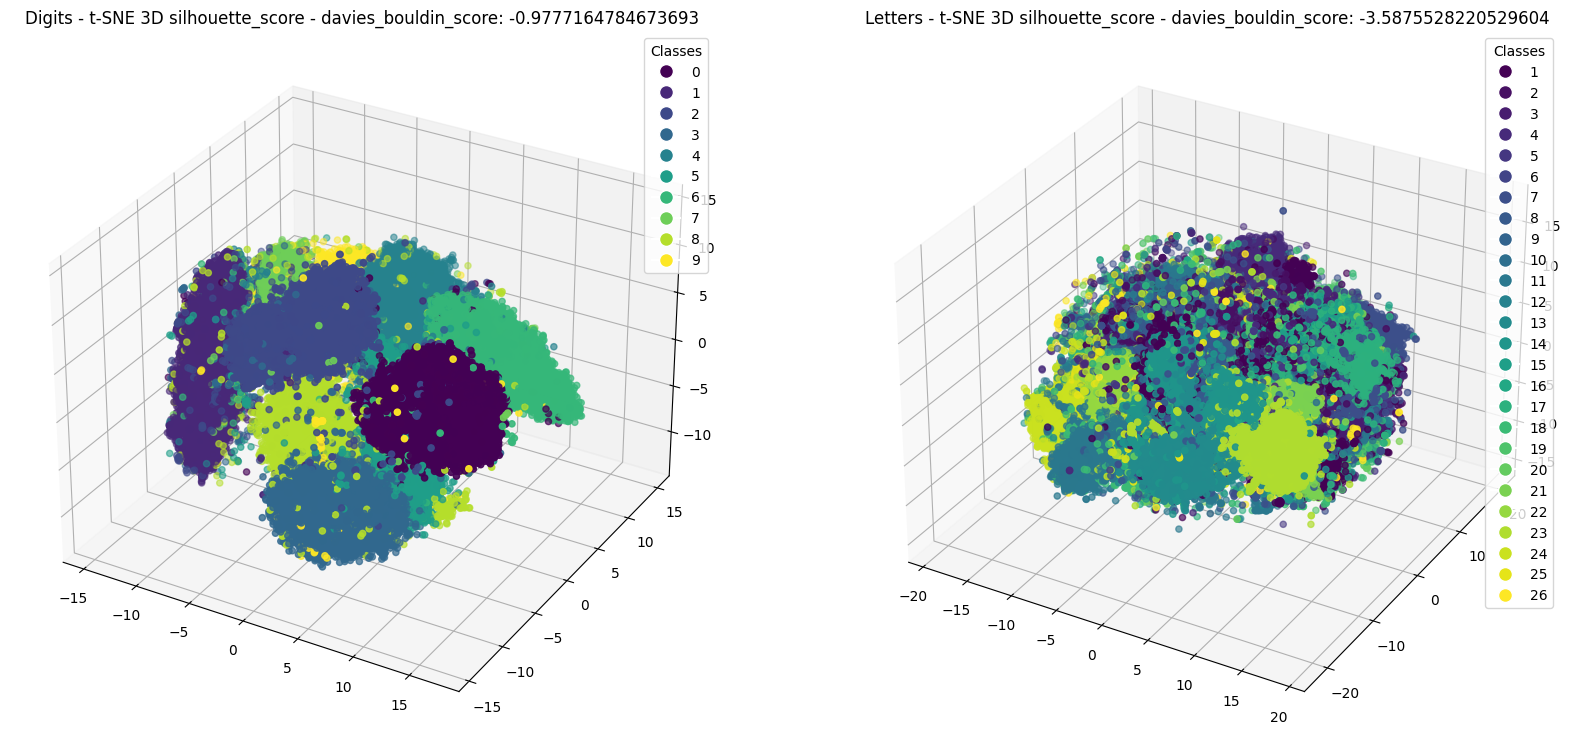

In [ ]:
fig = plt.figure(figsize=(20, 10))

for i, dataset in enumerate(datasets):
    optimal_perplexity = int(len(dataset["x"]) ** (1/2))
    tsne = TSNE(n_components=3, verbose=4, n_iter=500, perplexity=optimal_perplexity)
    reduced_data = tsne.fit_transform(dataset["x"])
    df_reduced = pd.DataFrame(data=reduced_data, columns=['Dimension 1', 'Dimension 2', 'Dimension 3'])
    df_reduced['Label'] = dataset["y"]
    score = custom_scoring_function(X=reduced_data, y_true=dataset["y"])

    ax = plt.subplot(1, 2, i+1, projection='3d')
    scatter = ax.scatter(df_reduced['Dimension 1'], df_reduced['Dimension 2'], df_reduced['Dimension 3'], c=df_reduced['Label'], cmap='viridis')
    ax.set_title(f'{dataset["name"]} - t-SNE 3D silhouette_score - davies_bouldin_score: {score}')

    unique_labels = sorted(df_reduced['Label'].unique())

    models.append(
        {
            "method_name": "t-SNE",
            "n_components": 3,
            "dataset_name": dataset["name"],
            "score": score
        }
    )

    handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10,
                    markerfacecolor=scatter.cmap(scatter.norm(label))) for label in unique_labels]
    plt.legend(handles=handles, title='Classes')

plt.show()

# UMAP

## Selecting the optimal number of neighbors

* When it comes to choosing the optimal number of neighbors (n_neighbors) in UMAP, there isn't a straightforward rule as there is for t-SNE. However, we have some guidelines:

* Since we have prior knowledge of the labels, a reasonable approach is to set n_neighbors to 10% of the mean of the label counts.

* Due to hardware limitations, in our case, we have opted to set it to 5% of the mean of the label counts.

* Additionally, it's worth noting that the number of epochs is set to 100. Ideally, it would be preferable to have it in the range of [200, 500].

## n_components = 2

UMAP(n_epochs=100, n_neighbors=350, verbose=True)
Sun Sep 24 18:05:57 2023 Construct fuzzy simplicial set
Sun Sep 24 18:05:58 2023 Finding Nearest Neighbors
Sun Sep 24 18:05:58 2023 Building RP forest with 18 trees
Sun Sep 24 18:06:00 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	 5  /  16
	Stopping threshold met -- exiting after 5 iterations
Sun Sep 24 18:12:23 2023 Finished Nearest Neighbor Search
Sun Sep 24 18:12:33 2023 Construct embedding


Epochs completed:   0%|            0/100 [00:00]

	completed  0  /  100 epochs
	completed  10  /  100 epochs
	completed  20  /  100 epochs
	completed  30  /  100 epochs
	completed  40  /  100 epochs
	completed  50  /  100 epochs
	completed  60  /  100 epochs
	completed  70  /  100 epochs
	completed  80  /  100 epochs
	completed  90  /  100 epochs
Sun Sep 24 18:13:24 2023 Finished embedding
UMAP(n_epochs=100, n_neighbors=199, verbose=True)
Sun Sep 24 18:14:07 2023 Construct fuzzy simplicial set
Sun Sep 24 18:14:07 2023 Finding Nearest Neighbors
Sun Sep 24 18:14:07 2023 Building RP forest with 21 trees
Sun Sep 24 18:14:11 2023 NN descent for 17 iterations
	 1  /  17
	 2  /  17
	 3  /  17
	 4  /  17
	Stopping threshold met -- exiting after 4 iterations
Sun Sep 24 18:19:20 2023 Finished Nearest Neighbor Search
Sun Sep 24 18:19:27 2023 Construct embedding


Epochs completed:   0%|            0/100 [00:00]

	completed  0  /  100 epochs
	completed  10  /  100 epochs
	completed  20  /  100 epochs
	completed  30  /  100 epochs
	completed  40  /  100 epochs
	completed  50  /  100 epochs
	completed  60  /  100 epochs
	completed  70  /  100 epochs
	completed  80  /  100 epochs
	completed  90  /  100 epochs
Sun Sep 24 18:20:37 2023 Finished embedding


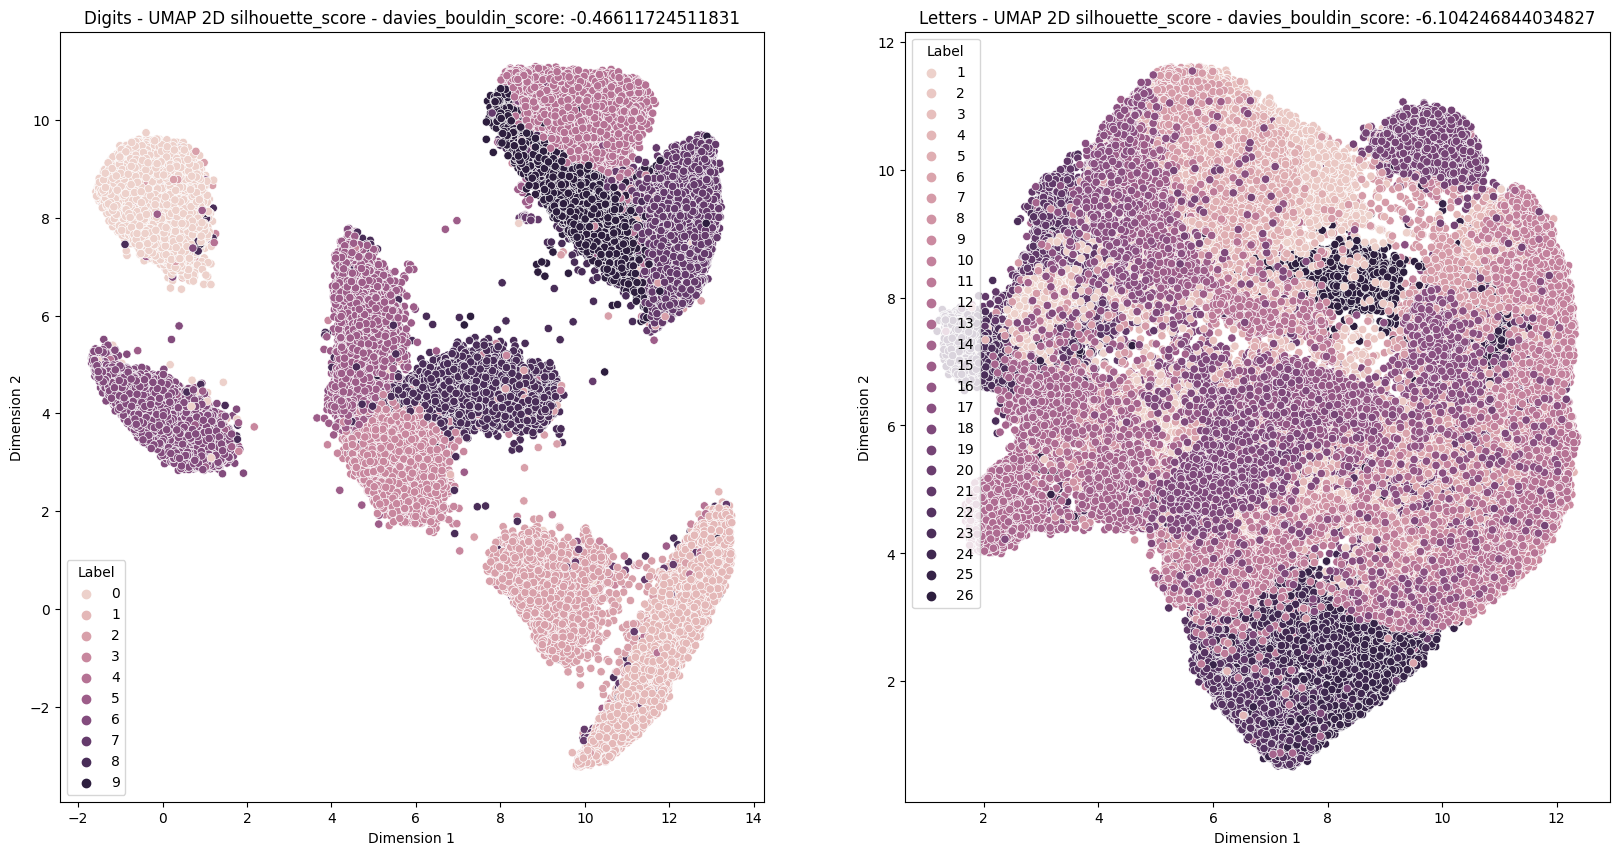

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
for i, dataset in enumerate(datasets):
    optimal_n_neighbors = int(dataset["y"].value_counts().mean() * 0.05)
    umap = UMAP(n_components=2, verbose=True, n_epochs=100, n_neighbors=optimal_n_neighbors)
    reduced_data = umap.fit_transform(dataset["x"])
    df_reduced = pd.DataFrame(data=reduced_data, columns=['Dimension 1', 'Dimension 2'])
    df_reduced['Label'] = dataset["y"]
    score = custom_scoring_function(X=reduced_data, y_true=dataset["y"])
    ax = sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Label', data=df_reduced, ax=axes[i], legend='full')
    ax.set_title(f'{dataset["name"]} - UMAP 2D silhouette_score - davies_bouldin_score: {score}')
    models.append(
        {
            "method_name": "UMAP",
            "n_components": 2,
            "dataset_name": dataset["name"],
            "score": score
        }
    )


## n_components = 3

UMAP(n_components=3, n_epochs=100, n_neighbors=350, verbose=True)
Mon Sep 25 03:34:27 2023 Construct fuzzy simplicial set
Mon Sep 25 03:34:27 2023 Finding Nearest Neighbors
Mon Sep 25 03:34:27 2023 Building RP forest with 18 trees
Mon Sep 25 03:34:38 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	 5  /  16
	Stopping threshold met -- exiting after 5 iterations
Mon Sep 25 03:44:28 2023 Finished Nearest Neighbor Search
Mon Sep 25 03:44:47 2023 Construct embedding


Epochs completed:   0%|            0/100 [00:00]

	completed  0  /  100 epochs
	completed  10  /  100 epochs
	completed  20  /  100 epochs
	completed  30  /  100 epochs
	completed  40  /  100 epochs
	completed  50  /  100 epochs
	completed  60  /  100 epochs
	completed  70  /  100 epochs
	completed  80  /  100 epochs
	completed  90  /  100 epochs
Mon Sep 25 03:46:30 2023 Finished embedding
UMAP(n_components=3, n_epochs=100, n_neighbors=199, verbose=True)
Mon Sep 25 03:47:44 2023 Construct fuzzy simplicial set
Mon Sep 25 03:47:44 2023 Finding Nearest Neighbors
Mon Sep 25 03:47:44 2023 Building RP forest with 21 trees
Mon Sep 25 03:47:53 2023 NN descent for 17 iterations
	 1  /  17
	 2  /  17
	 3  /  17
	 4  /  17
	Stopping threshold met -- exiting after 4 iterations
Mon Sep 25 03:55:44 2023 Finished Nearest Neighbor Search
Mon Sep 25 03:55:56 2023 Construct embedding


Epochs completed:   0%|            0/100 [00:00]

	completed  0  /  100 epochs
	completed  10  /  100 epochs
	completed  20  /  100 epochs
	completed  30  /  100 epochs
	completed  40  /  100 epochs
	completed  50  /  100 epochs
	completed  60  /  100 epochs
	completed  70  /  100 epochs
	completed  80  /  100 epochs
	completed  90  /  100 epochs
Mon Sep 25 03:58:26 2023 Finished embedding


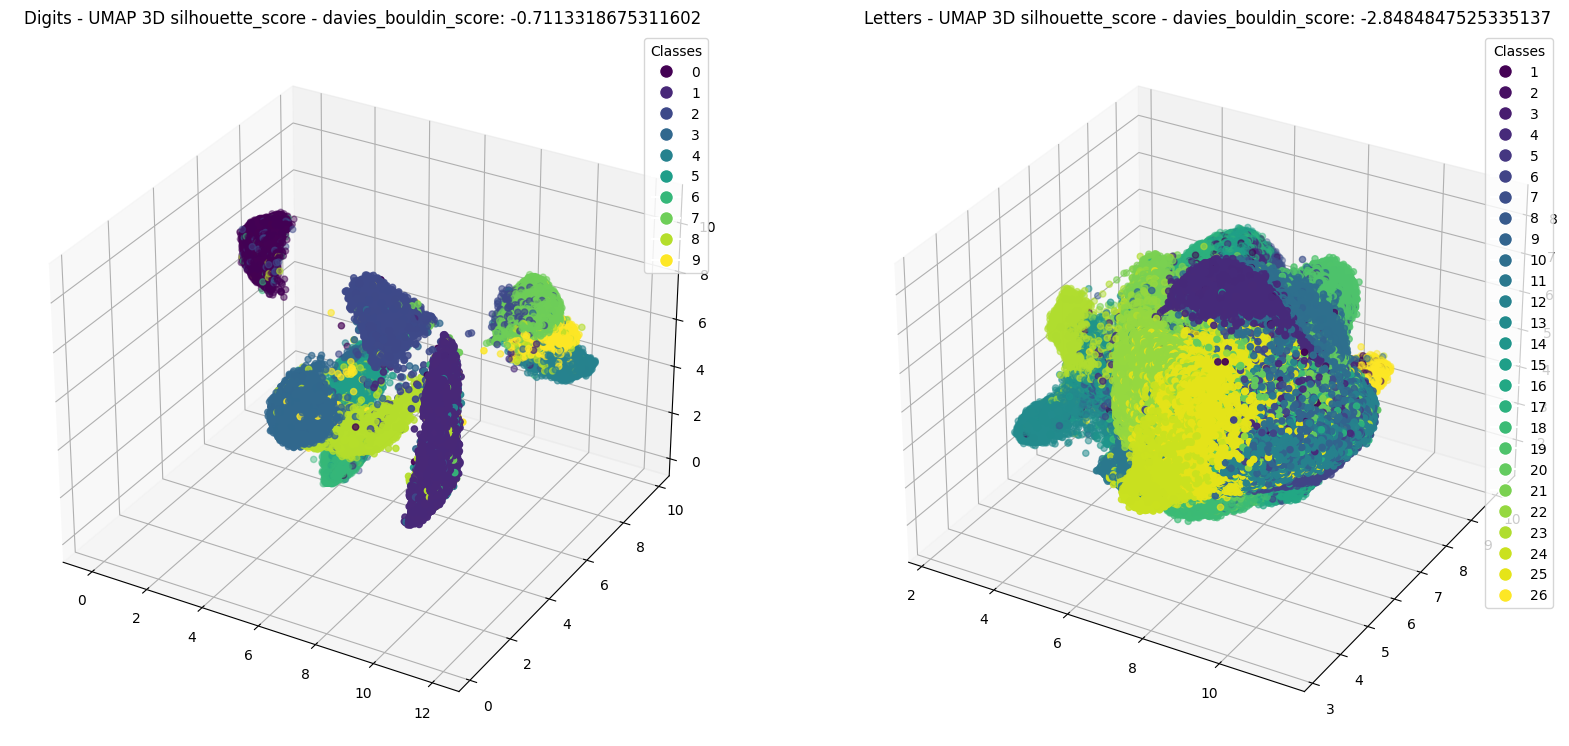

In [ ]:
fig = plt.figure(figsize=(20, 10))

for i, dataset in enumerate(datasets):
    optimal_n_neighbors = int(dataset["y"].value_counts().mean() * 0.05)
    umap = UMAP(n_components=3, verbose=True, n_epochs=100, n_neighbors=optimal_n_neighbors)
    reduced_data = umap.fit_transform(dataset["x"])
    df_reduced = pd.DataFrame(data=reduced_data, columns=['Dimension 1', 'Dimension 2', 'Dimension 3'])
    df_reduced['Label'] = dataset["y"]
    score = custom_scoring_function(X=reduced_data, y_true=dataset["y"])

    ax = plt.subplot(1, 2, i+1, projection='3d')
    scatter = ax.scatter(df_reduced['Dimension 1'], df_reduced['Dimension 2'], df_reduced['Dimension 3'], c=df_reduced['Label'], cmap='viridis')
    ax.set_title(f'{dataset["name"]} - UMAP 3D silhouette_score - davies_bouldin_score: {score}')

    unique_labels = sorted(df_reduced['Label'].unique())

    models.append(
        {
            "method_name": "UMAP",
            "n_components": 3,
            "dataset_name": dataset["name"],
            "score": score
        }
    )

    handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10,
                    markerfacecolor=scatter.cmap(scatter.norm(label))) for label in unique_labels]
    plt.legend(handles=handles, title='Classes')

plt.show()


# Selecting the best models

## UMAP is the Preferred Technique:

1. In most cases, UMAP outperforms t-SNE across different scenarios and datasets.

2. t-SNE Exception:
* There is an exception where t-SNE performs better.
* This exception occurs when the number of components is set to 3, specifically on the Letters dataset.

3. Improving UMAP Performance:

* To enhance UMAP's performance even further, consider the following strategies:
1. Increase the n_epochs parameter for UMAP.
2. Fine-tune the n_neighbors and min_dist hyperparameters.

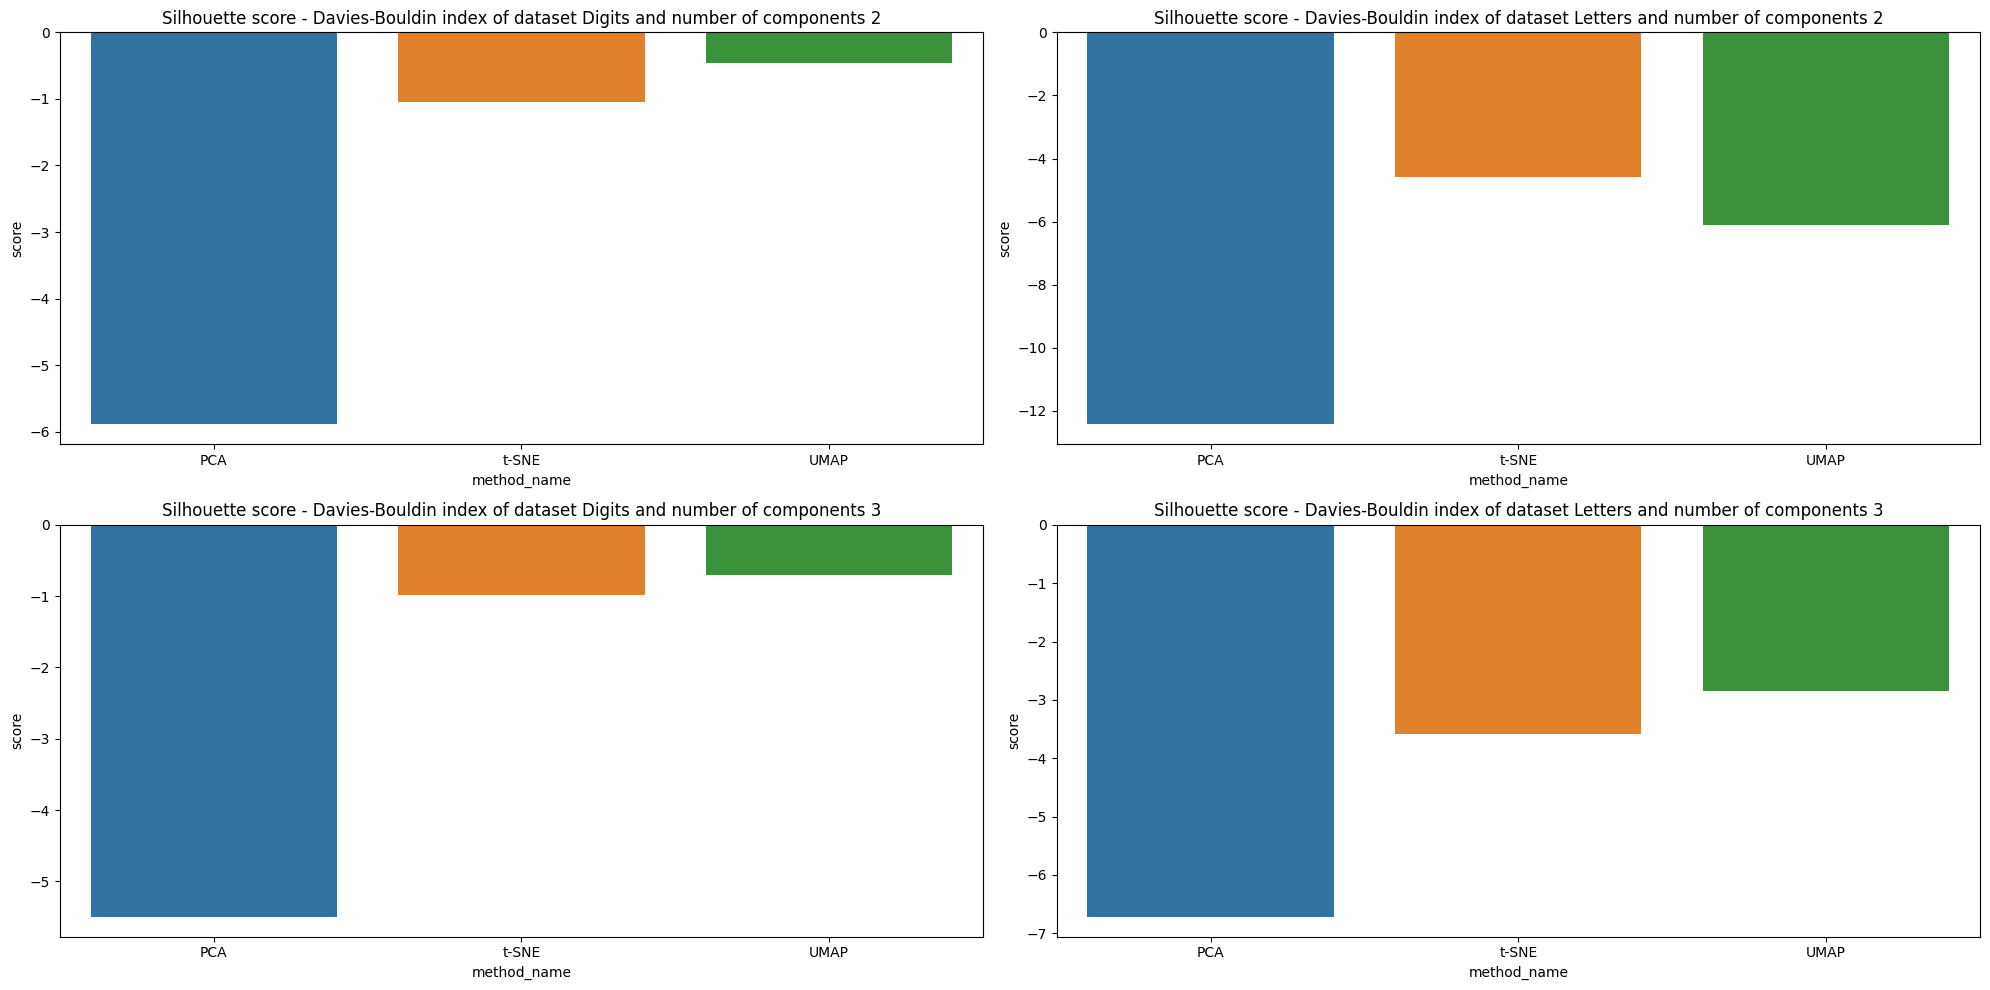

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for i, dimension in enumerate([2, 3]):
  for j, dataset_name in enumerate(["Digits", "Letters"]):
    pair_model = [model for model in models if model["dataset_name"] == dataset_name and model["n_components"] == dimension]
    sns.barplot(y="score", x="method_name", data=pd.DataFrame(pair_model), ax=ax[i, j])
    ax[i, j].set_title(f"Silhouette score - Davies-Bouldin index of dataset {dataset_name} and number of components {dimension}")
plt.tight_layout()
plt.show()